**Kelompok 2**

Rio Wardhana Nasution (5311522113)

Christofel Natanael Butar Butar (5311422114)

Mohamad Iqbal Algifari (5311422116)

DAVID Gunawan (5311422117)

Adian Rahmat (5311422119)



In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

sns.set(rc={'figure.figsize':(8,6)})

from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR
from sklearn.tree import export_graphviz

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
crm = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/crm1.csv')
crm

,msisdn,gender,year_of_birth,system_status,mobile_type,value_segment
0,aeef4233d9ad34e41f7ecf48d64646f8,MALE,1985.0,ACTIVE,Prepaid,Tier_3
1,2397d009e705bc8a2654cbb3f480cc59,MALE,1958.0,ACTIVE,Prepaid,Tier_3
2,6f05d738919f9283322bae17dc366bf5,MALE,1976.0,ACTIVE,Prepaid,Tier_3
3,45352d9d126f86f40c7eee79a82c833c,MALE,1996.0,ACTIVE,Prepaid,Tier_3
4,959b00a279e2785cfa81728338c324f7,FEMALE,1960.0,ACTIVE,Prepaid,Tier_3
...,...,...,...,...,...,...
13627488,be38c74c3e2a56c9a364f22dcec0767c,NaN,1983.0,ACTIVE,Prepaid,Tier_3
13627489,37eac64c097badb6ee39c846b63f4c6c,NaN,1980.0,ACTIVE,Prepaid,Tier_3
13627490,3b8f3d93bab8f72f403fe59ce070c2a6,Male,1973.0,ACTIVE,Prepaid,Tier_3
13627491,52c53173d02ccdffac08712fcff12132,NaN,1989.0,ACTIVE,Prepaid,Tier_3


In [4]:
dev = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/device1.csv')
dev

,msisdn,imei_tac,brand_name,model_name,os_name,os_vendor
0,c0e80ecc67484f293db0cf723146c9d6,7ce90a5469d6a07dc8c770956cc29482,SAMSUNG,GALAXY J1 ACE (SM-J111F),Android,Google
1,2bce0cd398cbc9b2478ecaf1ef62b2c1,110f73736e1e1fe0ef5cb8a581bc0ec2,WALTON,OLVIO L22,NaN,NaN
2,d7b8b49fafb853a3aef0c20d49bca845,ddf90b7c597d7714637ecde342a8c609,LG,W1500,LG OS,LG
3,d628f3b548dc74c5fde92323c61c819e,c395eac49569e6741faf98284aef725c,SYMPHONY,B13,NaN,NaN
4,e33e767a53a8dceadebc3354221bbf6a,395b163b071e5880e66ac57c5768673e,SAMSUNG,METRO SM-B350ED,Samsung OS,Samsung
...,...,...,...,...,...,...
2440095,ac9d61bd5f205eaae29bd4cd6d695266,996d94ee7d7b350c080dea2eed447e95,SYMPHONY,B17,NaN,NaN
2440096,3966735fc35ebf8a24603861adf4a247,10c8c8f0a98681cf7438937018408e89,NOKIA,301,Series40,Symbian
2440097,467d1a29282c66ee9a3ab9a956be7725,7b3b0514a9263e18c232abcb74530c4c,LENOVO,A319,Android,Google
2440098,e8e54281b251fbc5d4620389e98427ae,e873af88d975a9d0a7e5b5d3ea5ce3d2,SAMSUNG,GALAXY J2 2016 (SM-J210F),Android,Google


In [5]:
rev = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/rev1.csv')
rev

,msisdn,week_number,revenue_usd
0,66e94d24d8e0d5776a8a6b694782eff0,26,20.265621
1,66e94d24d8e0d5776a8a6b694782eff0,34,5.361164
2,66e94d24d8e0d5776a8a6b694782eff0,31,18.181347
3,66e94d24d8e0d5776a8a6b694782eff0,35,16.857391
4,66e94d24d8e0d5776a8a6b694782eff0,24,14.392326
...,...,...,...
1704596,a5e6e78c5e57c25d390c4266c80f1ae3,35,19.830709
1704597,a5e6e78c5e57c25d390c4266c80f1ae3,29,12.577000
1704598,a5e6e78c5e57c25d390c4266c80f1ae3,33,14.361289
1704599,a5e6e78c5e57c25d390c4266c80f1ae3,34,20.018287


**Merge Data**

In [6]:
merged = pd.merge(pd.merge(crm, dev, on='msisdn'),rev,on='msisdn')

**tipe Data di dataframe**

In [7]:
display(merged.dtypes)

msisdn            object
gender            object
year_of_birth    float64
system_status     object
mobile_type       object
value_segment     object
imei_tac          object
brand_name        object
model_name        object
os_name           object
os_vendor         object
week_number        int64
revenue_usd      float64
dtype: object

**Cek null value**

In [8]:
merged = merged.dropna()
merged

merged.isnull().sum()

msisdn           0
gender           0
year_of_birth    0
system_status    0
mobile_type      0
value_segment    0
imei_tac         0
brand_name       0
model_name       0
os_name          0
os_vendor        0
week_number      0
revenue_usd      0
dtype: int64

**olah data 'gender'**

In [9]:
merged.get('gender').unique()

array(['Male', 'Female', 'MALE', 'FEMALE', 'M'], dtype=object)

In [10]:
# Function to converge genders, then convert to integers (Male- 0, Female- 1)

def new_gender_status(gender):
    if gender == 'Male':
        return 0
    elif gender == 'MALE':
        return 0
    elif gender ==  'M':
        return 0
    elif gender == 'Female':
        return 1
    elif gender == 'FEMALE':
        return 1

merged= merged.assign(genders= merged.get('gender').apply(new_gender_status))#assigning new column to name genders
merged= merged.drop(columns= ['gender']) #drop old gender category
merged.get('genders').unique()
merged

,msisdn,year_of_birth,system_status,mobile_type,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd,genders
0,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883,0
1,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665,0
2,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760,0
3,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223,0
4,4f5216988c44ec0a96a82a04f28b49fa,1988.0,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,20.038510,0
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,11.958916,0
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,10.229510,0
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,1952.0,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,10.108985,0


**olah data 'year of birth'**

In [11]:
#Column is currently float64, convert to integer

# chronological array of unique year of birth
birth_years = merged.groupby('year_of_birth').count().reset_index().get('year_of_birth').unique()
birth_years = birth_years.astype(int) #int() and np.int() did not work
birth_years #it doesn't allow me to use it in a function

# assigning a new column: birth_year- rather than year_of_birth
merged= merged.assign(birth_year= merged.get('year_of_birth').astype(int))
merged = merged.drop(columns= ['year_of_birth'])
merged

,msisdn,system_status,mobile_type,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd,genders,birth_year
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883,0,1988
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665,0,1988
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760,0,1988
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223,0,1988
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Prepaid,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059,0,1988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,20.038510,0,1952
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,11.958916,0,1952
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,10.229510,0,1952
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Prepaid,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,10.108985,0,1952


In [12]:
#Function that assigns 1 to'ACTIVE' statuses and else/'SUSPEND' to 0, we only have 2 options, the else is the value is going to be the 'churned' accounts
#def system_status(status):
    #if status == 'ACTIVE':
        #return 1
    #else:
        #return 0

#merged = merged.assign(active_status= merged.get('system_status').apply(system_status))
#merged = merged.drop(columns = ['system_status'])
#merged

**olah data 'mobile tipe'**

In [13]:
merged.get('mobile_type').unique()

array(['Prepaid', 'Postpaid'], dtype=object)

In [14]:
def mobile_type(type):
    if type == 'Postpaid':
        return 0
    elif type == 'Prepaid':
        return 1

merged = merged.assign(paid_status= merged.get('mobile_type').apply(mobile_type))
merged = merged.drop(columns= ['mobile_type'])
merged

,msisdn,system_status,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,revenue_usd,genders,birth_year,paid_status
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,8.388883,0,1988,1
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,4.570665,0,1988,1
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,19.584760,0,1988,1
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,9.272223,0,1988,1
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,13.292059,0,1988,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,20.038510,0,1952,1
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,11.958916,0,1952,1
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,10.229510,0,1952,1
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,10.108985,0,1952,1


**ubah revenue dari float ke integer**

In [15]:
merged = merged.assign(revenue= merged.get('revenue_usd').astype(int))
merged = merged.drop(columns= ['revenue_usd'])
merged

,msisdn,system_status,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,genders,birth_year,paid_status,revenue
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,0,1988,1,8
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,0,1988,1,4
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,0,1988,1,19
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,0,1988,1,9
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,0,1988,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,0,1952,1,20
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,0,1952,1,11
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,0,1952,1,10
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,0,1952,1,10


**ubah year ke decade**

In [16]:
def decade_to_year(year):
    divide_year = year/10
    int_year = int(divide_year)
    multiply = int_year*10
    return multiply

merged= merged.assign(decade= merged.get('birth_year').apply(decade_to_year))
merged

,msisdn,system_status,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,genders,birth_year,paid_status,revenue,decade
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,0,1988,1,8,1980
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,0,1988,1,4,1980
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,0,1988,1,19,1980
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,0,1988,1,9,1980
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,0,1988,1,13,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,0,1952,1,20,1950
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,0,1952,1,11,1950
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,0,1952,1,10,1950
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,0,1952,1,10,1950


In [17]:
merged = merged.assign(age= 2022-merged.get('birth_year').astype(int))
merged

,msisdn,system_status,value_segment,imei_tac,brand_name,model_name,os_name,os_vendor,week_number,genders,birth_year,paid_status,revenue,decade,age
0,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,34,0,1988,1,8,1980,34
1,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,24,0,1988,1,4,1980,34
2,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,30,0,1988,1,19,1980,34
3,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,31,0,1988,1,9,1980,34
4,4f5216988c44ec0a96a82a04f28b49fa,ACTIVE,Tier_3,3b91b28c977886f58210f219e4a79b5a,SYMPHONY,I10 PLUS,Android,Google,33,0,1988,1,13,1980,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213228,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,23,0,1952,1,20,1950,70
213229,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,25,0,1952,1,11,1950,70
213230,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,29,0,1952,1,10,1950,70
213231,07cba7c6dd43e14dbbace9bb36d1f3a8,ACTIVE,Tier_3,165acdb176c002cd45cab78630f5405b,SYMPHONY,"V60, P6, V40, T90, ZVI",Android,Google,28,0,1952,1,10,1950,70


**menghilangkan beberapa kolom**

In [18]:
merged_cleaned= merged.drop(columns= ['msisdn','value_segment', 'imei_tac', 'brand_name', 'model_name', 'os_name', 'os_vendor','week_number'])
merged_cleaned

,system_status,genders,birth_year,paid_status,revenue,decade,age
0,ACTIVE,0,1988,1,8,1980,34
1,ACTIVE,0,1988,1,4,1980,34
2,ACTIVE,0,1988,1,19,1980,34
3,ACTIVE,0,1988,1,9,1980,34
4,ACTIVE,0,1988,1,13,1980,34
...,...,...,...,...,...,...,...
213228,ACTIVE,0,1952,1,20,1950,70
213229,ACTIVE,0,1952,1,11,1950,70
213230,ACTIVE,0,1952,1,10,1950,70
213231,ACTIVE,0,1952,1,10,1950,70


In [19]:
for column in merged_cleaned:
    unique_vals = np.unique(merged_cleaned[column])
    nr_values = len(unique_vals)
    print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))

The number of values for feature system_status :2 -- ['ACTIVE' 'SUSPEND']
The number of values for feature genders :2 -- [0 1]
The number of values for feature birth_year :73 -- [1919 1920 1924 1927 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000]
The number of values for feature paid_status :2 -- [0 1]
The number of values for feature revenue :45 -- [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 44 57 66 82]
The number of values for feature decade :10 -- [1910 1920 1930 1940 1950 1960 1970 1980 1990 2000]
The number of values for feature age :73 -- [ 22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37

**Proportion**

In [20]:
#Number of SUSPEND users
merged_cleaned[merged_cleaned.get('system_status')=='SUSPEND'].count()

#Proportion of ACTIVE users
merged_cleaned[merged_cleaned.get('system_status')=='ACTIVE'].count()/merged_cleaned.get('system_status').count()

system_status    0.979428
genders          0.979428
birth_year       0.979428
paid_status      0.979428
revenue          0.979428
decade           0.979428
age              0.979428
dtype: float64

In [21]:
all_df_men = merged_cleaned[merged_cleaned.get('genders')==0]
#107590 male customers

all_df_female = merged_cleaned[merged_cleaned.get('genders')==1]
#16560 female customers

In [22]:
all_gender_female_proportion= len(all_df_female)/len(merged_cleaned)
all_gender_male_proportion= 1- all_gender_female_proportion
np.round(all_gender_male_proportion, decimals=3), np.round(all_gender_female_proportion, decimals= 3)
print('The proportion of male is {} and the proportion of female is {}'.format(all_gender_male_proportion, all_gender_female_proportion))

The proportion of male is 0.8666129681836487 and the proportion of female is 0.1333870318163512


In [23]:
active_df= merged_cleaned
active_df = active_df[active_df.get('system_status')=='ACTIVE']
#121596 customers

In [24]:
active_df_male = active_df[active_df.get('genders')==0]
active_df_female = active_df[active_df.get('genders')==1]

In [25]:
active_gender_female_proportion= len(active_df_female)/len(active_df)
active_gender_male_proportion= 1- active_gender_female_proportion
np.round(active_gender_male_proportion, decimals=3), np.round(active_gender_female_proportion, decimals= 3)
print('The proportion of male is {} and the proportion of female is {}'.format(active_gender_female_proportion, active_gender_male_proportion))

The proportion of male is 0.1342149412809632 and the proportion of female is 0.8657850587190368


In [26]:
suspend_df = merged_cleaned
suspend_df = merged_cleaned[merged_cleaned.get('system_status')=='SUSPEND']

#2554 rows/ex-customers

In [27]:
suspend_df_men = suspend_df[suspend_df.get('genders')==0] #2314
suspend_df_female = suspend_df[suspend_df.get('genders')==1] #240

In [28]:
suspend_gender_female_proportion= len(suspend_df_female)/len(suspend_df)
suspend_gender_male_proportion= 1- suspend_gender_female_proportion
np.round(suspend_gender_male_proportion, decimals=3), np.round(suspend_gender_female_proportion, decimals= 3)
print('The proportion of male is {} and the proportion of female is {}'.format(suspend_gender_female_proportion, suspend_gender_male_proportion))

The proportion of male is 0.09397024275646046 and the proportion of female is 0.9060297572435395


**Tampilan grafik antara gender dan jumlah customer**

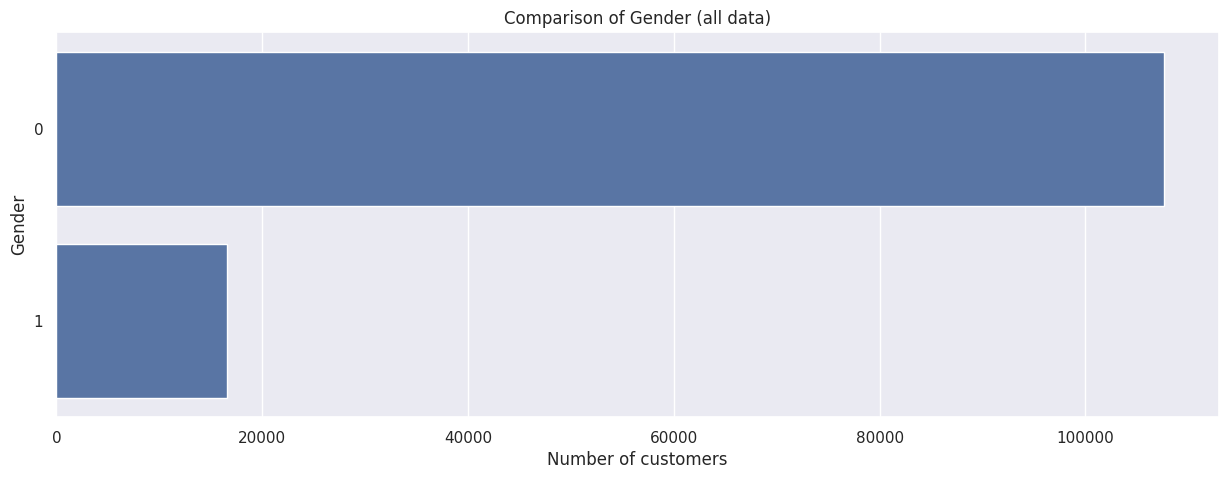

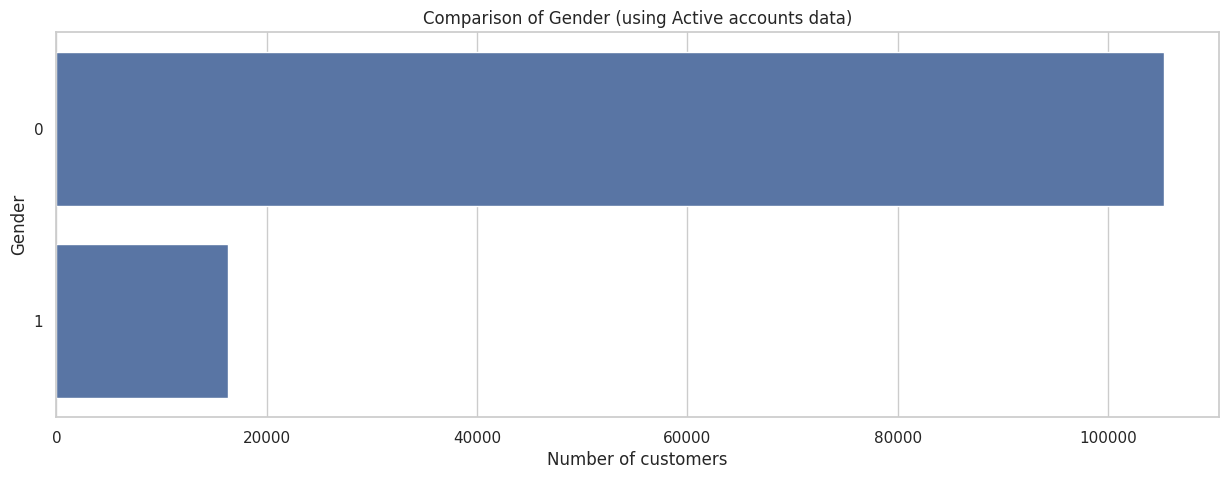

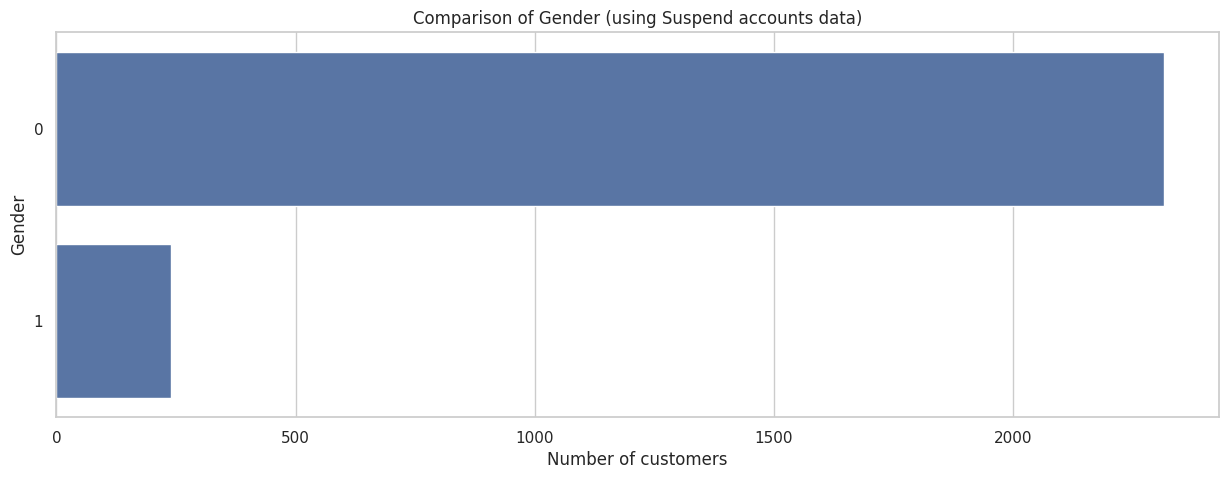

In [29]:
#all- gender
all_gender= plt.figure(figsize=(15,5))
sns.countplot(y='genders', data=merged_cleaned)
sns.set_style('whitegrid')
plt.title('Comparison of Gender (all data)')
plt.xlabel('Number of customers')
plt.ylabel('Gender')
plt.savefig("all_gender.png")
plt.show()


#active- gender
active_gender= plt.figure(figsize=(15,5))
sns.countplot(y='genders', data= active_df)
sns.set_style('whitegrid')
plt.title('Comparison of Gender (using Active accounts data)')
plt.xlabel('Number of customers')
plt.ylabel('Gender')
plt.savefig("active_gender.png")
plt.show()


#suspend- gender
suspend_gender= plt.figure(figsize=(15,5))
sns.countplot(y='genders', data= suspend_df)
sns.set_style('whitegrid')
plt.title('Comparison of Gender (using Suspend accounts data)')
plt.xlabel('Number of customers')
plt.ylabel('Gender')
plt.savefig("suspend_gender.png")
plt.show()

**Tampilan grafik antara Distribution dan Age**

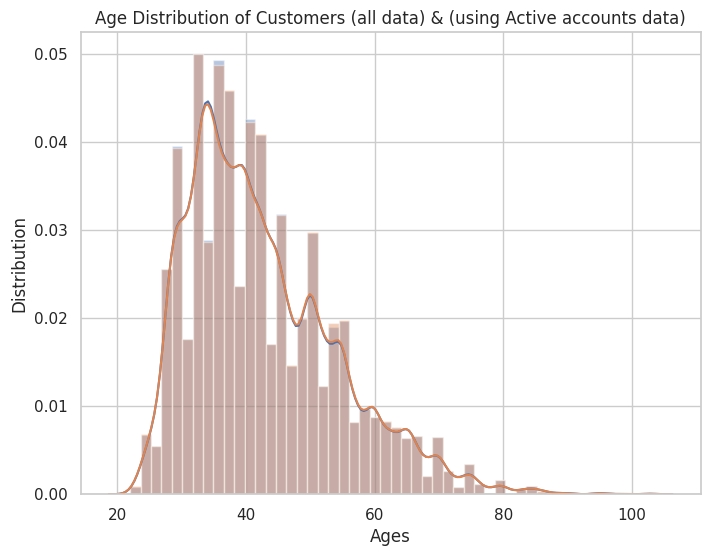

In [30]:
#age- all
all_age= sns.distplot(merged_cleaned['age'])
plt.title('Age Distribution of Customers')
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.savefig("age_all.png")


#age- active
all_age= sns.distplot(active_df['age'])
plt.title('Age Distribution of Customers (all data) & (using Active accounts data)')
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.savefig("age_active.png")

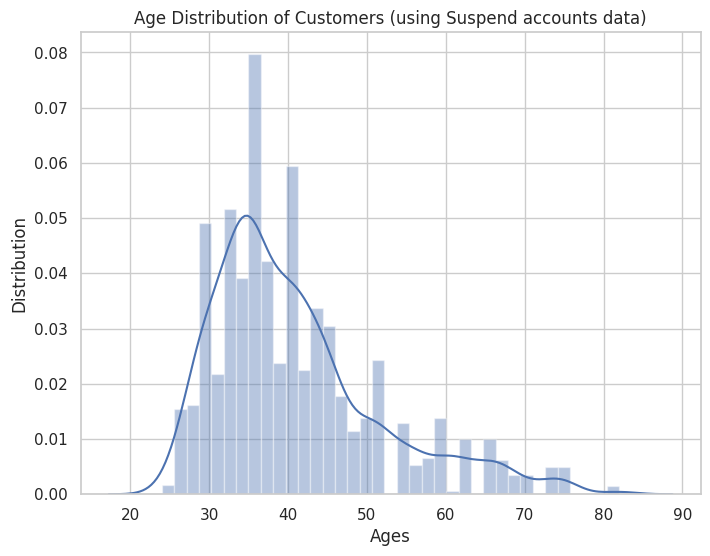

In [31]:
#age- suspend
all_age= sns.distplot(suspend_df['age'])
plt.title('Age Distribution of Customers (using Suspend accounts data)')
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.savefig("age_suspend.png")

**Tampilan grafik antara Revenue dan Density**

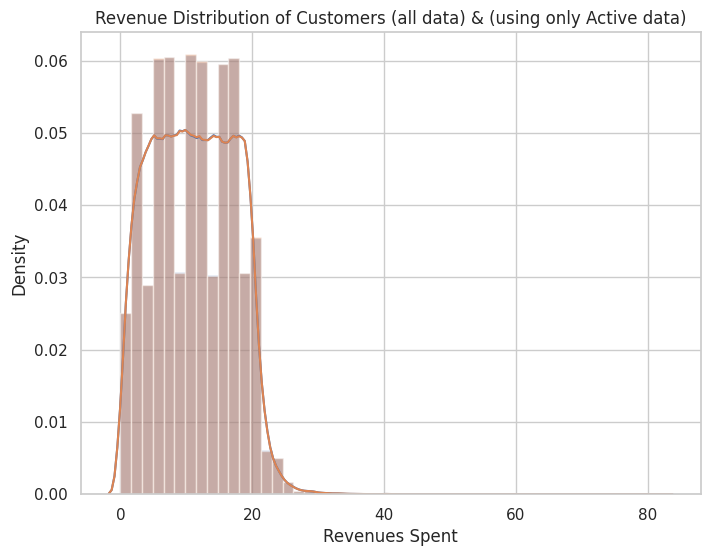

In [32]:
#all- revenue
all_rev = sns.distplot(merged_cleaned['revenue'])
plt.title('Revenue Distribution of Customers')
plt.xlabel('Revenues Spent')
plt.ylabel('Density')
plt.savefig("all_rev.png")


#active- revenue
all_rev = sns.distplot(active_df['revenue'])
plt.title('Revenue Distribution of Customers (all data) & (using only Active data)')
plt.xlabel('Revenues Spent')
plt.ylabel('Density')
plt.savefig("active_rev.png")

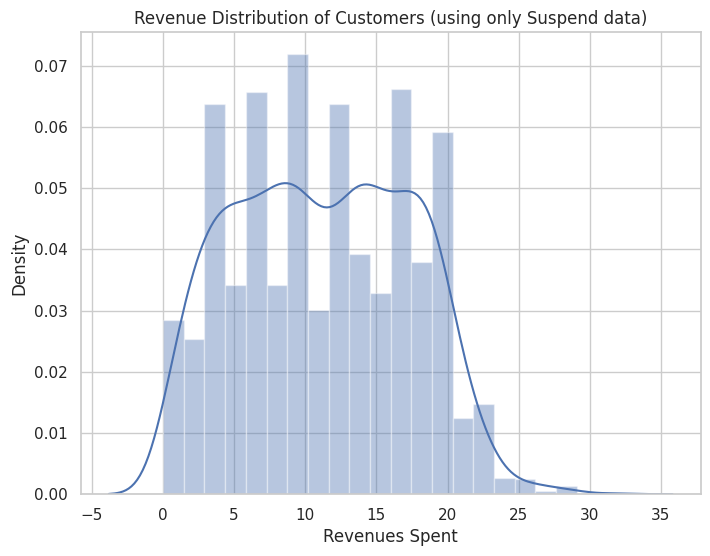

In [33]:
#suspend- revenue
all_rev = sns.distplot(suspend_df['revenue'])
plt.title('Revenue Distribution of Customers (using only Suspend data)')
plt.xlabel('Revenues Spent')
plt.ylabel('Density')
plt.savefig("suspend_rev.png")

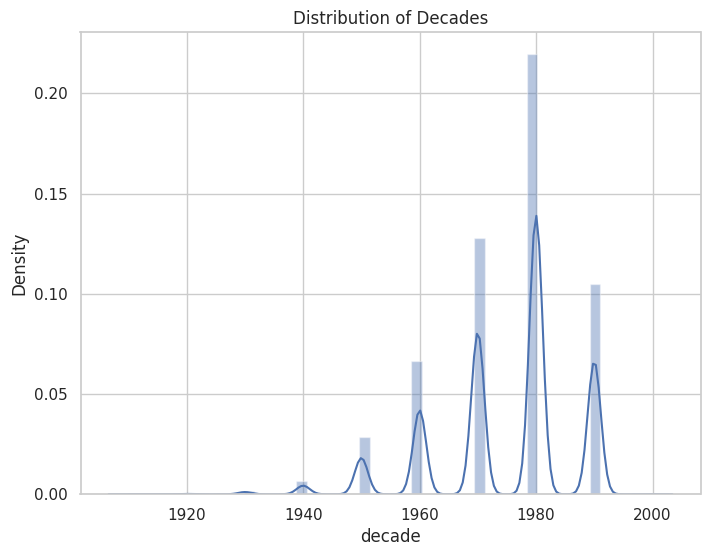

In [34]:
sns.distplot(merged_cleaned['decade'])
plt.title('Distribution of Decades')
plt.savefig('Basic_decade.png')

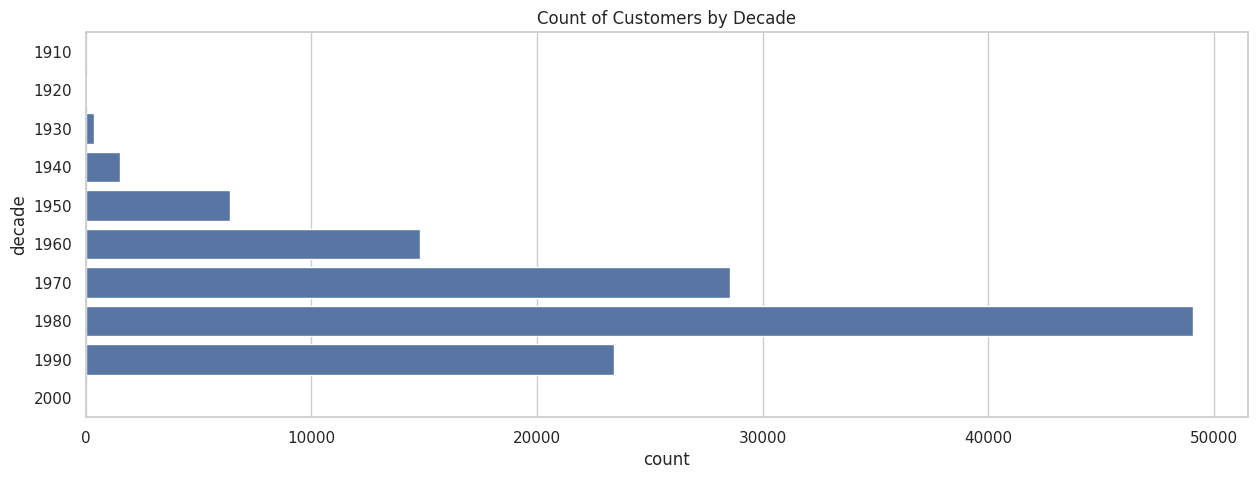

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(y='decade', data= merged_cleaned)
plt.title('Count of Customers by Decade')
plt.savefig("Basic_decades_p2.png")
plt.show()

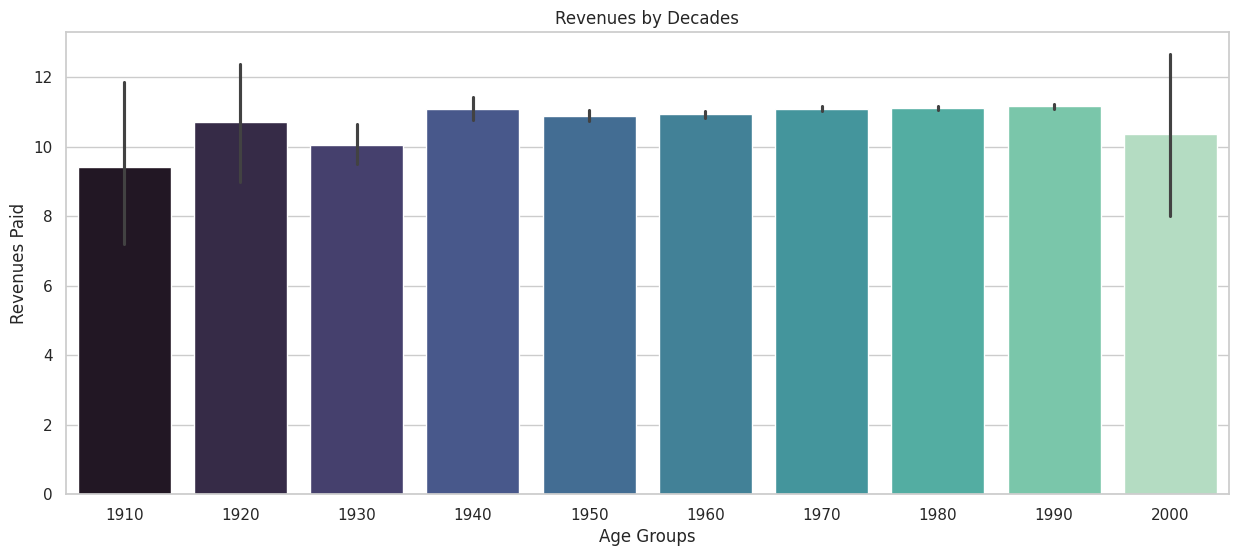

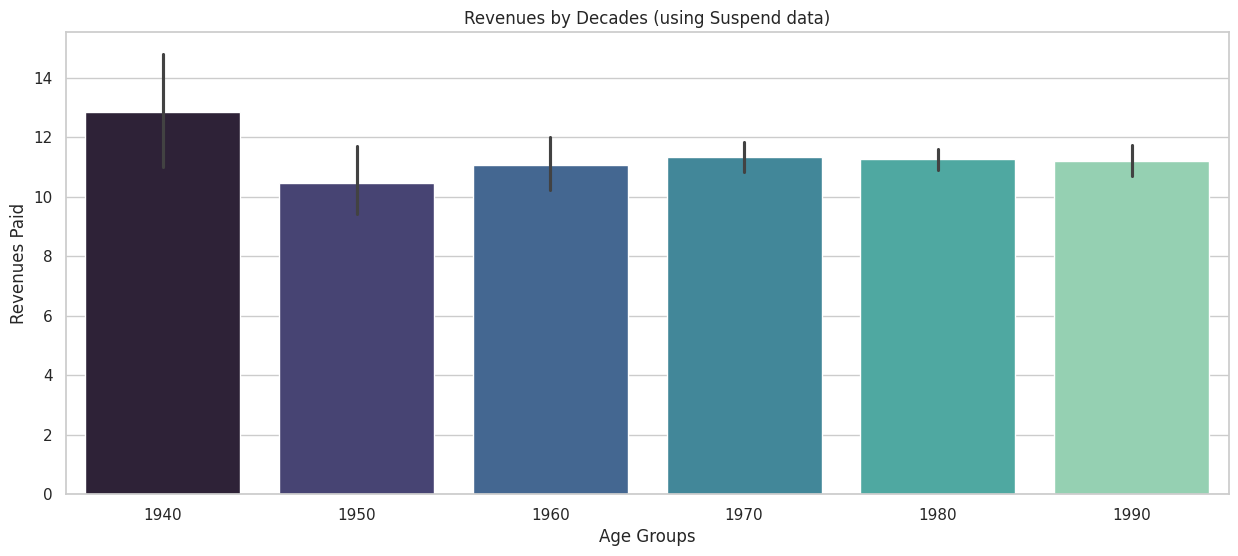

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(x=merged_cleaned.get('decade'), y=merged_cleaned.get('revenue'), palette= 'mako')
plt.title('Revenues by Decades')
plt.xlabel('Age Groups')
plt.ylabel('Revenues Paid')
plt.savefig("all_revenue_by_decade.png")
plt.show()


plt.figure(figsize=(15,6))
sns.barplot(x=suspend_df.get('decade'), y=suspend_df.get('revenue'), palette= 'mako')
plt.title('Revenues by Decades (using Suspend data)')
plt.xlabel('Age Groups')
plt.ylabel('Revenues Paid')
plt.savefig("suspend_revenue_by_decade.png.png")
plt.show()

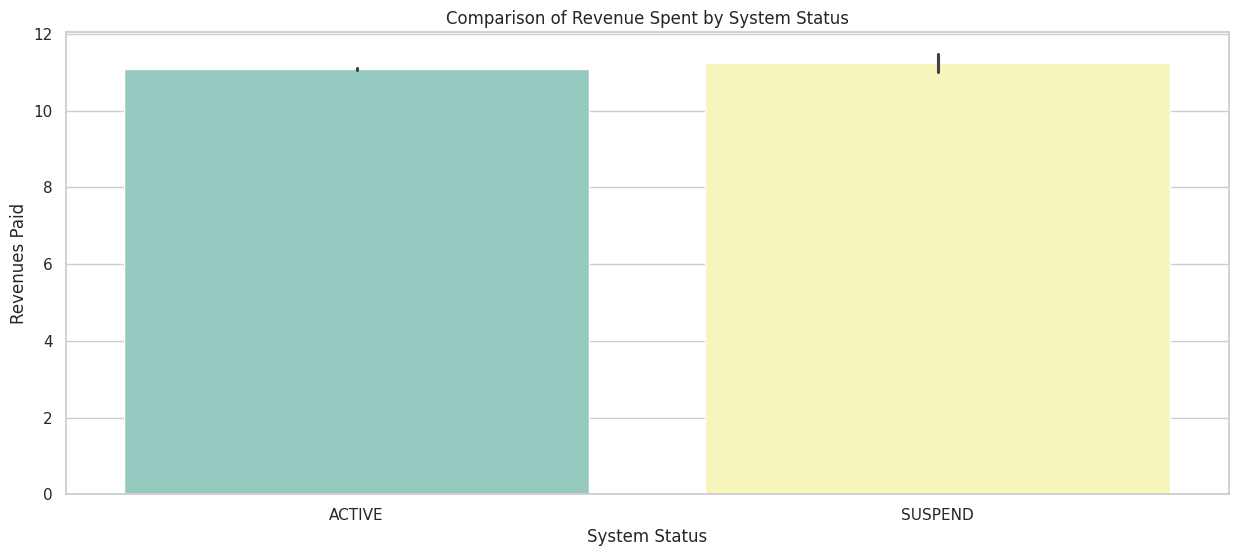

In [37]:
plt.figure(figsize=(15,6))
sns.barplot(x=merged_cleaned.get('system_status'), y=merged_cleaned.get('revenue'), palette= 'Set3')
plt.title('Comparison of Revenue Spent by System Status')
plt.xlabel('System Status')
plt.ylabel('Revenues Paid')
plt.savefig("comparison_of_revenue_by_system_status.png")
plt.show()

In [38]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

cols = merged_cleaned.select_dtypes(include='O').columns

for col in cols:
    merged_cleaned[col] = label_enc.fit_transform(merged_cleaned[col])
# displaying the data after encoding
merged_cleaned

,system_status,genders,birth_year,paid_status,revenue,decade,age
0,0,0,1988,1,8,1980,34
1,0,0,1988,1,4,1980,34
2,0,0,1988,1,19,1980,34
3,0,0,1988,1,9,1980,34
4,0,0,1988,1,13,1980,34
...,...,...,...,...,...,...,...
213228,0,0,1952,1,20,1950,70
213229,0,0,1952,1,11,1950,70
213230,0,0,1952,1,10,1950,70
213231,0,0,1952,1,10,1950,70


In [39]:
#Testing on churn rate/system_status
X = merged_cleaned.drop('system_status', axis=1).values# Input features (attributes)
y = merged_cleaned['system_status'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

X shape: (124150, 6)
y shape: (124150,)


**Metode Decision Tree**

In [47]:
# Function to evaluate best max_depth and min_samples_leaf

best_acc = 0

for criterion in ['gini', 'entropy']:
    for max_depth in [2,3,4,5,6]:
        for min_samples_leaf in [5, 10, 20, 30]:
            dtree = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
            dtree.fit(X_train, y_train)
            test_predictions = dtree.predict(X_test)
            test_acc = accuracy_score(y_test, test_predictions)
            if test_acc > best_acc:
                best_params = f"criterion: {criterion}, max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}"
                best_acc = test_acc

print(best_params)
print(best_acc)

criterion: gini, max_depth: 2, min_samples_leaf: 5
0.9789770438985098


In [48]:
#Setting decision tree for max_depth of 2 + min_samples_split of 5
dt = DecisionTreeClassifier(criterion='entropy', max_depth= 2,min_samples_split=5, random_state=1) #if use max_depth=8, we can see SUSPEND
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=5,
                       random_state=1)

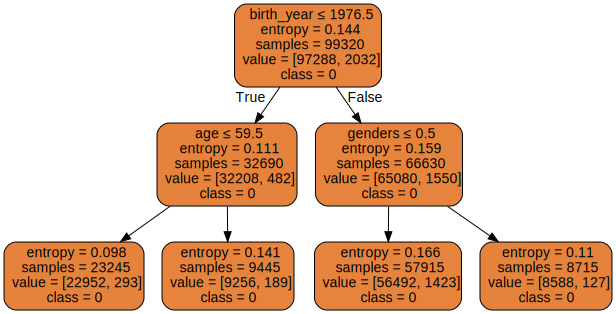

In [49]:
#Regression Tree Chart

import graphviz

dot_data = tree.export_graphviz(dt, out_file=None,
    feature_names=merged_cleaned.drop('system_status', axis=1).columns,
    class_names=merged_cleaned['system_status'].unique().astype(str),
    filled=True, rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [50]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))


Training Accuracy is:  0.9795408779701973
Testing Accuracy is:  0.9789770438985098


In [51]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

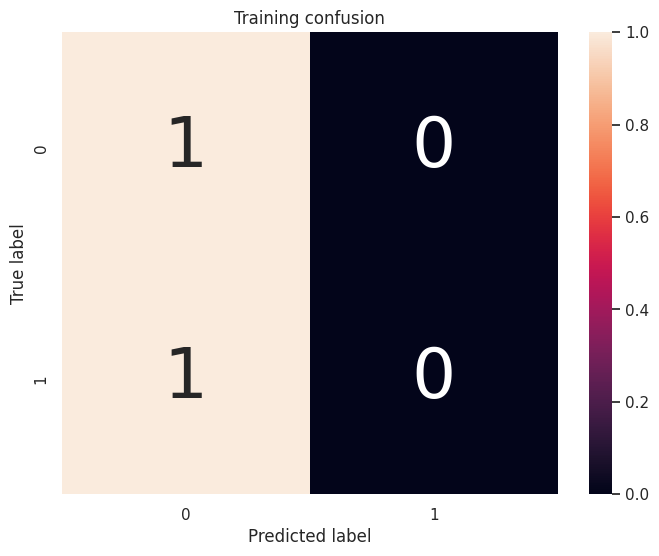

In [52]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')


In [53]:
y_pred = dt.predict(X_train)
y_pred
confusion_matrix(y_train, y_pred)

array([[97288,     0],
       [ 2032,     0]])

In [54]:
# Hitung error rate
error_rate = 1 - accuracy

# Format error rate sebagai persen
error_rate_persen = error_rate * 100

# Tampilkan error rate dalam persen
print("Error Rate:", error_rate_persen, "%")

Error Rate: 2.114377768828035 %


In [55]:
from sklearn.metrics import classification_report

# Predicting labels on the test set
y_pred = tree_clf0.predict(X_test)

# Generating classification report
class_report = classification_report(y_test, y_pred, target_names=["ACTIVE", "SUSPEND"])

# Displaying classification report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

      ACTIVE       0.98      1.00      0.99     24308
     SUSPEND       0.00      0.00      0.00       522

    accuracy                           0.98     24830
   macro avg       0.49      0.50      0.49     24830
weighted avg       0.96      0.98      0.97     24830

